# LETS GROW MORE (LGMVIPFEB2022)

## Author:Chandrima Thakur
## Task 3 : Exploratory Data Analysis on Dataset - Terrorism 
## Level : INTERMEDIATE
## Language : Python

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

## READING THE DATA-SET

In [2]:
df = pd.read_csv("globalterrorism.csv",encoding="latin-1")
print("Data imported successfully")
df.head()

Data imported successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## LOOKING INTO THE SHAPE

In [3]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print('\n')

The dataset has 181691 rows and 135 columns




In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## FEATURE SELECTION FOR EDA

There are too many columns but we select only spefic ones

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## LOOKING INTO THE DATASET

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

## GETTING THE STATISTICAL INFORMATION

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,181691.0,NaN,NaN,NaN,2002.638997,13.25943,1970.0,1991.0,2009.0,2014.0,2017.0
Month,181691.0,NaN,NaN,NaN,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
Day,181691.0,NaN,NaN,NaN,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
Country,181691,205,Iraq,24636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,181270,2855,Baghdad,7645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,181691,12,Middle East & North Africa,50474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,181257,36674,Unknown,9775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,177135.0,NaN,NaN,NaN,23.498343,18.569242,-53.154613,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,NaN,NaN,NaN,-458.695653,204778.988611,-86185896.0,4.54564,43.246506,68.710327,179.366667
AttackType,181691,9,Bombing/Explosion,88255,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## LOOKING FOR MISSING VALUES

In [10]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

We find that the columns state,city,latitude,longitude,Killed,Wounded,Target,Summary,Motive  have missing values

## TREATING MISSING VALUES

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

No more missing values found

# EDA WITH VISUALIZATION

In [13]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,46556.0,NaN,NaN,NaN,2007.937172,6.487769,1970.0,2006.0,2009.0,2011.0,2017.0
Month,46556.0,NaN,NaN,NaN,6.492847,3.378594,1.0,4.0,7.0,9.0,12.0
Day,46556.0,NaN,NaN,NaN,15.240699,8.822615,0.0,8.0,15.0,23.0,31.0
Country,46556,164,Iraq,8811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,46556,1838,Baghdad,3598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,46556,12,South Asia,15885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,46556,13083,Baghdad,3600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,46556.0,NaN,NaN,NaN,26.632072,14.033304,-42.250458,18.102156,32.335078,34.565494,74.633553
longitude,46556.0,NaN,NaN,NaN,48.089948,47.436208,-157.858333,35.026613,45.2024,75.548049,179.366667
AttackType,46556,9,Bombing/Explosion,23566,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## REGIONS AFFECTED BY TERRORIST ATTACKS

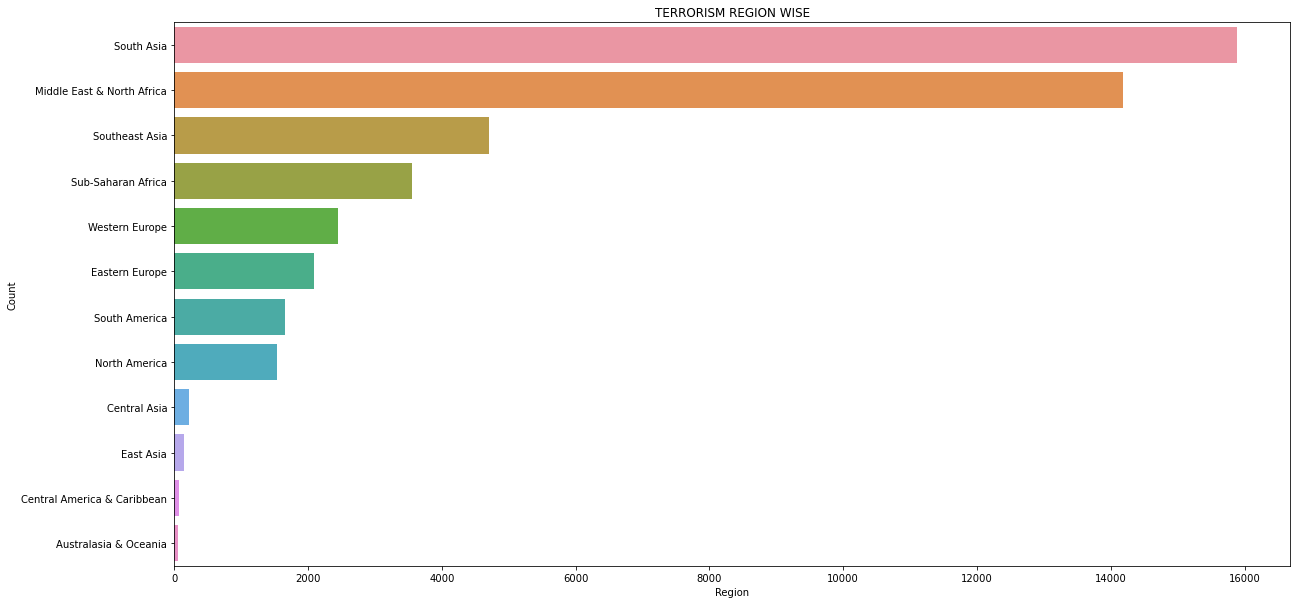

In [14]:
plt.subplots(figsize=(20,10))
sns.countplot(y=df["Region"],order = df['Region'].value_counts().index)
plt.title('TERRORISM REGION WISE')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

### OBSERVATIONS:
#### Globally Most of the terrorism attacks happpened South Asia followed by Middle East & North Africa and South America.
#### East Asia, Central Asia,Central America & Caribbean,Australasia & Oceania can be considered as most peaceful regions in the world as the terrorism rate is less.

## COUNTRIES AFFECTED BY TERRORIST ATTACKS

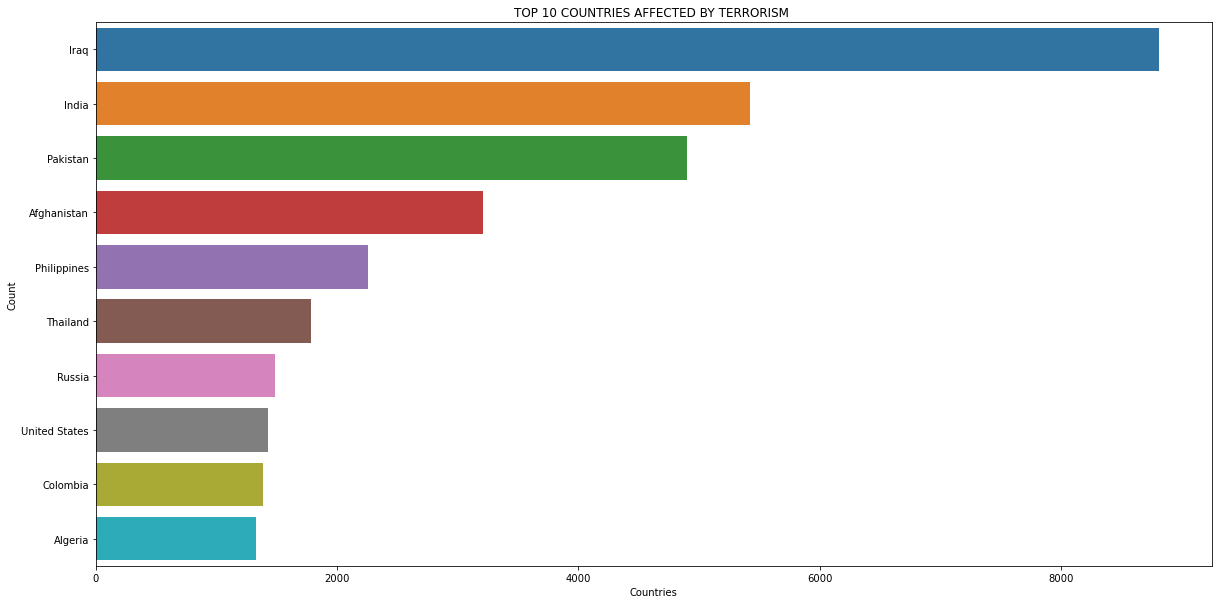

In [15]:
plt.subplots(figsize=(20,10))
sns.countplot(y=df["Country"],order = df['Country'].value_counts()[:10].index)
plt.title('TOP 10 COUNTRIES AFFECTED BY TERRORISM ')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

## STATE AFFECTED BY TERRORIST ATTACKS

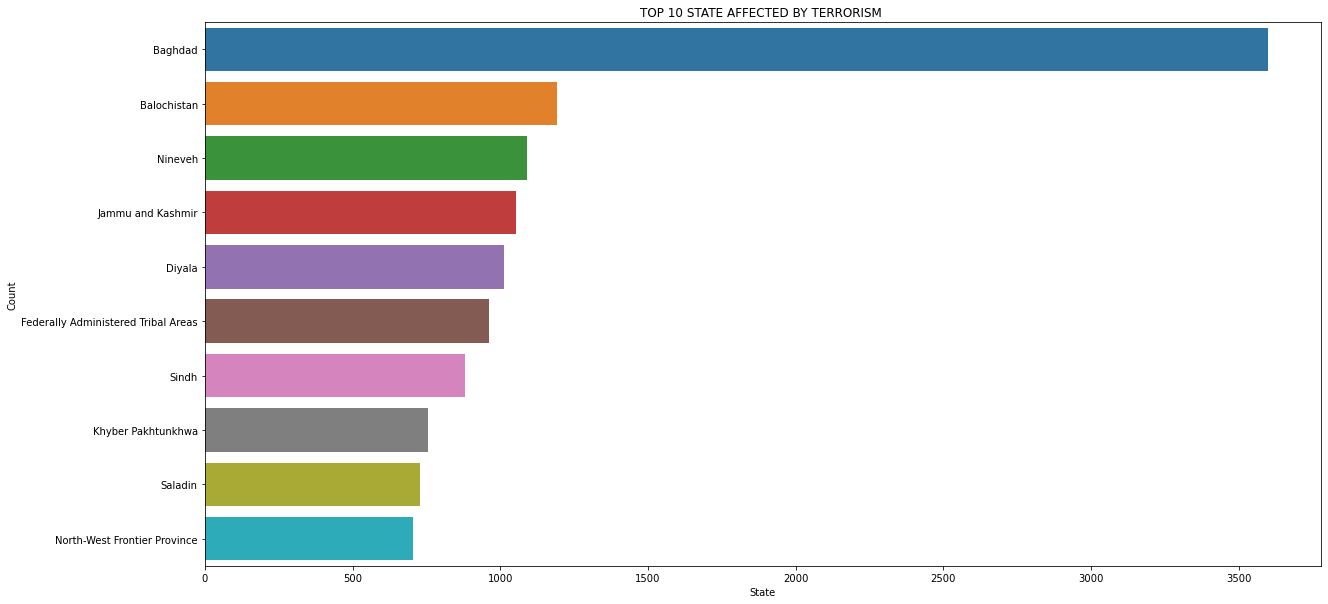

In [16]:
plt.subplots(figsize=(20,10))
sns.countplot(y=df["state"],order = df['state'].value_counts()[:10].index)
plt.title('TOP 10 STATE AFFECTED BY TERRORISM ')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

## CITY AFFECTED BY TERRORIST ATTACKS

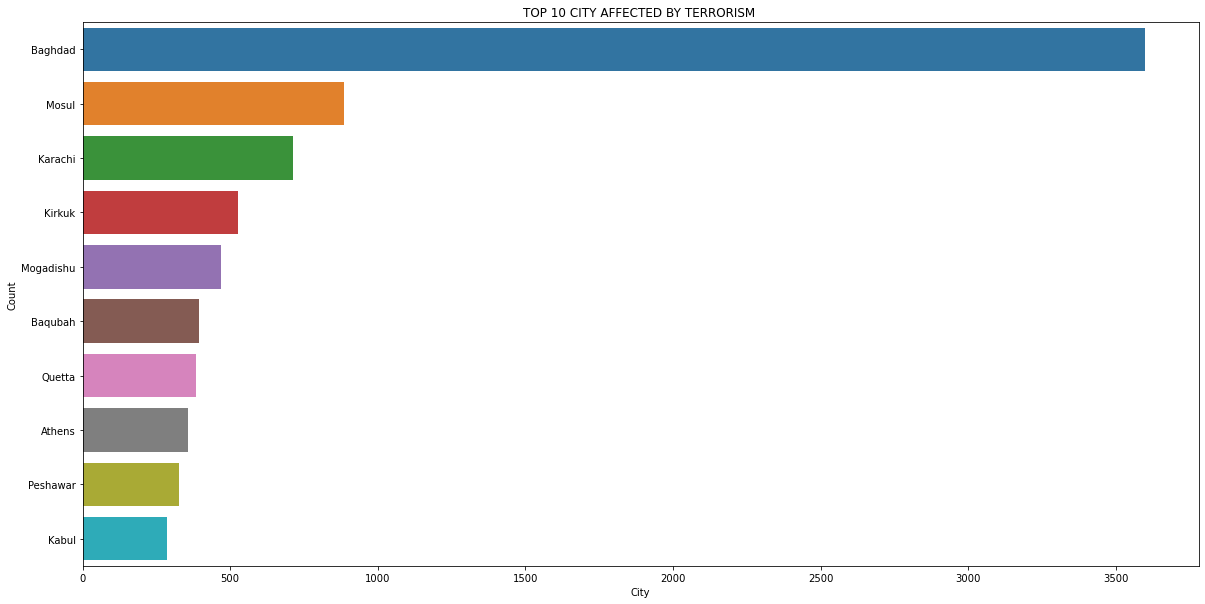

In [17]:
sc= df.drop(df[ df['city'] == "Unknown" ].index)
plt.subplots(figsize=(20,10))
sns.countplot(y=sc["city"],order = sc['city'].value_counts()[:10].index)
plt.title('TOP 10 CITY AFFECTED BY TERRORISM ')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

## ATTACK TYPES FOR TERRORIST ATTACKS

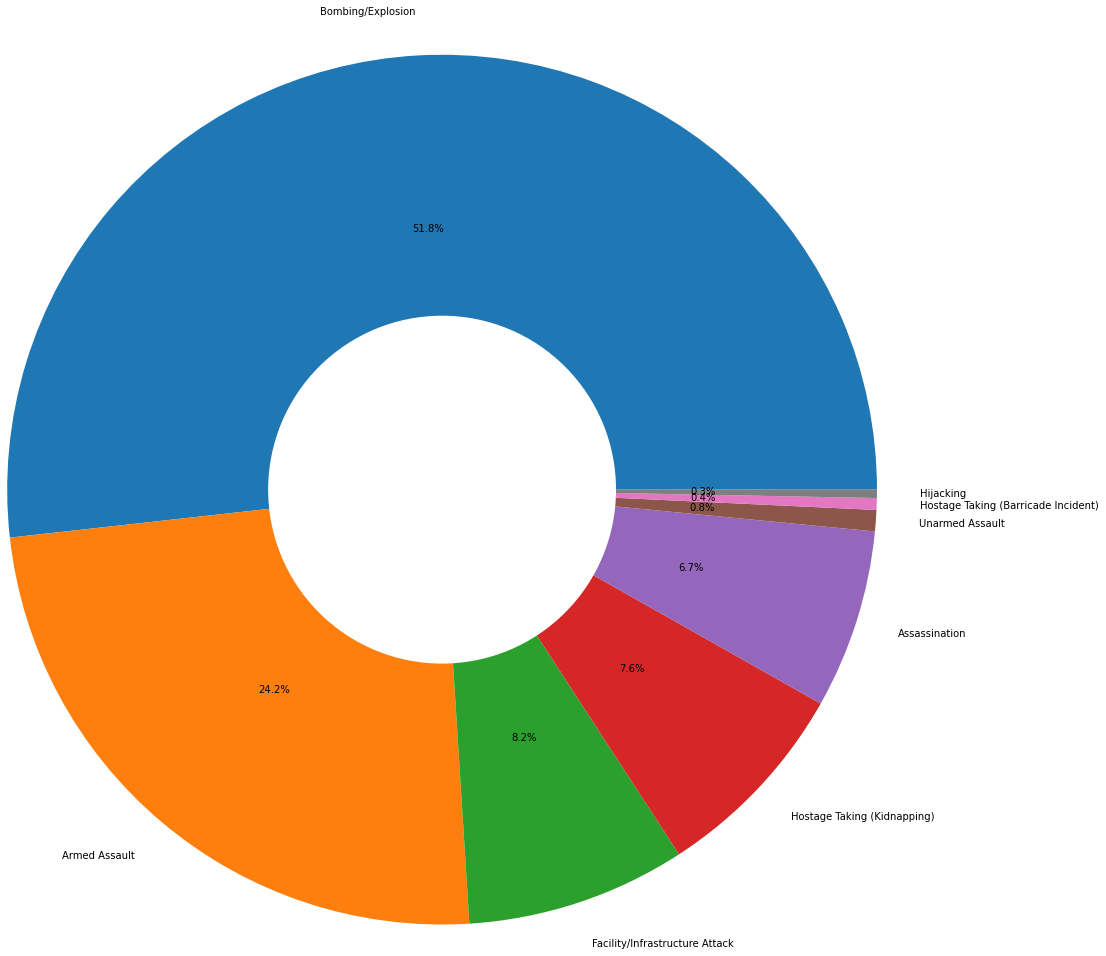

In [18]:
m=df.drop(df[ df['AttackType'] == "Unknown" ].index)
plt.pie(m["AttackType"].value_counts(),labels=m["AttackType"].value_counts().index,autopct='%1.1f%%',radius=5)
plt.pie([1],colors=['w'],radius=2)
plt.show()

#### OBSERVATION:
#### Almost half of the terrorism cases, Bombing or Explosion used as the primary attack type.

####  Other than Bombing there 'Armed Assault', 'Facility/infrastructure Attack', 'Kidnapping' etc also used as famous attack types.
 #### There are very less cases of 'Hijacking', 'Hostage Taking(Barricade)' and 'Unarmed Assault' in terrorism.

In [19]:
## TERRORIST ACTIVITIES BY REGION IN EACH YEAR

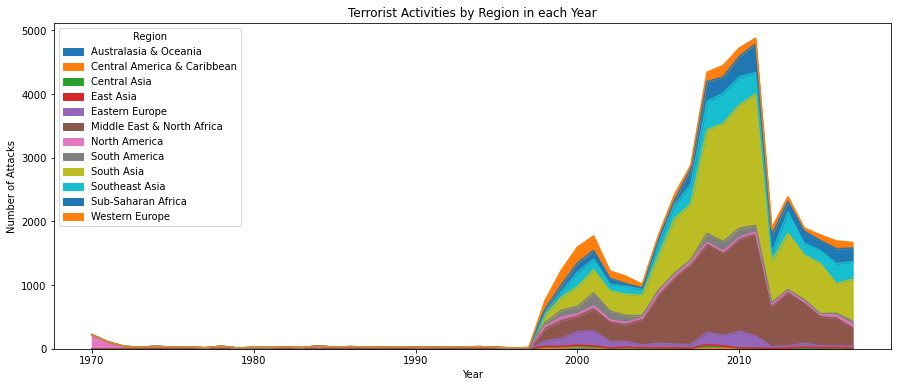

In [20]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## REGION WISE ATTACK TYPE

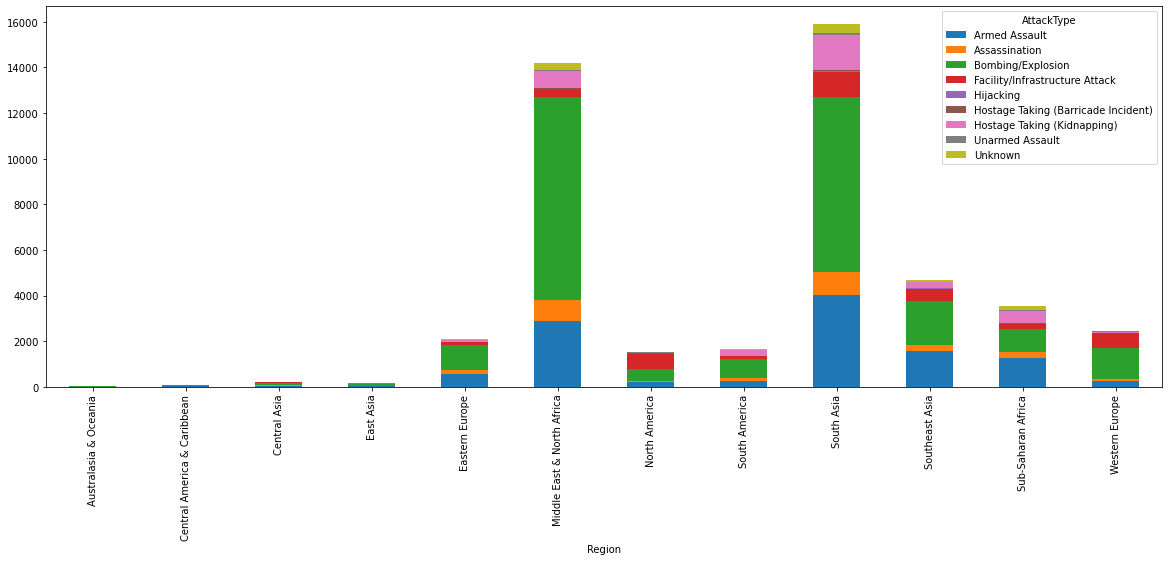

In [21]:
ct = pd.crosstab(df['Region'],df['AttackType'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

## YEAR WISE TERRORIST ATTACK

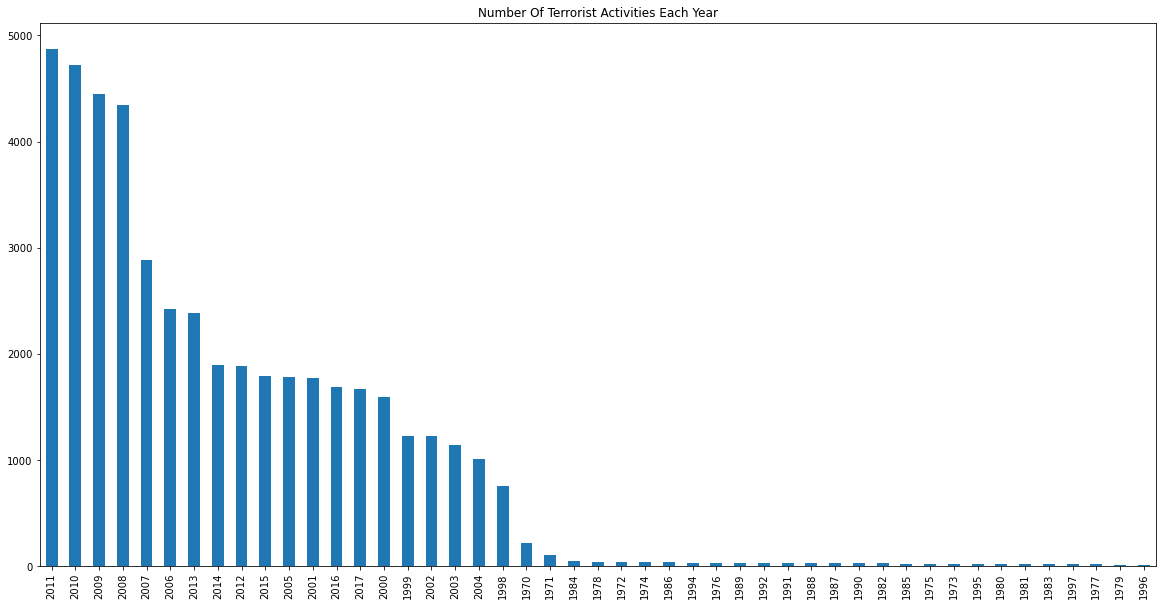

In [22]:
df['Year'].value_counts().plot(kind='bar',figsize=[20,10])
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

We can see that the terrorist activities have increased through the years

## GROUPWISE  MAXIMUM THREAT

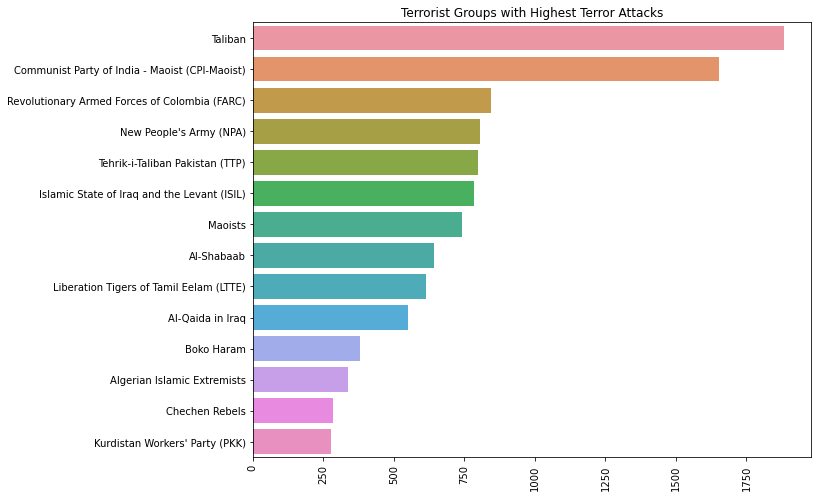

In [23]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index)
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

WE can see that taiban and Cpi-maoist are the groups that have made the highest threat 

## REGION WISE WEAPON

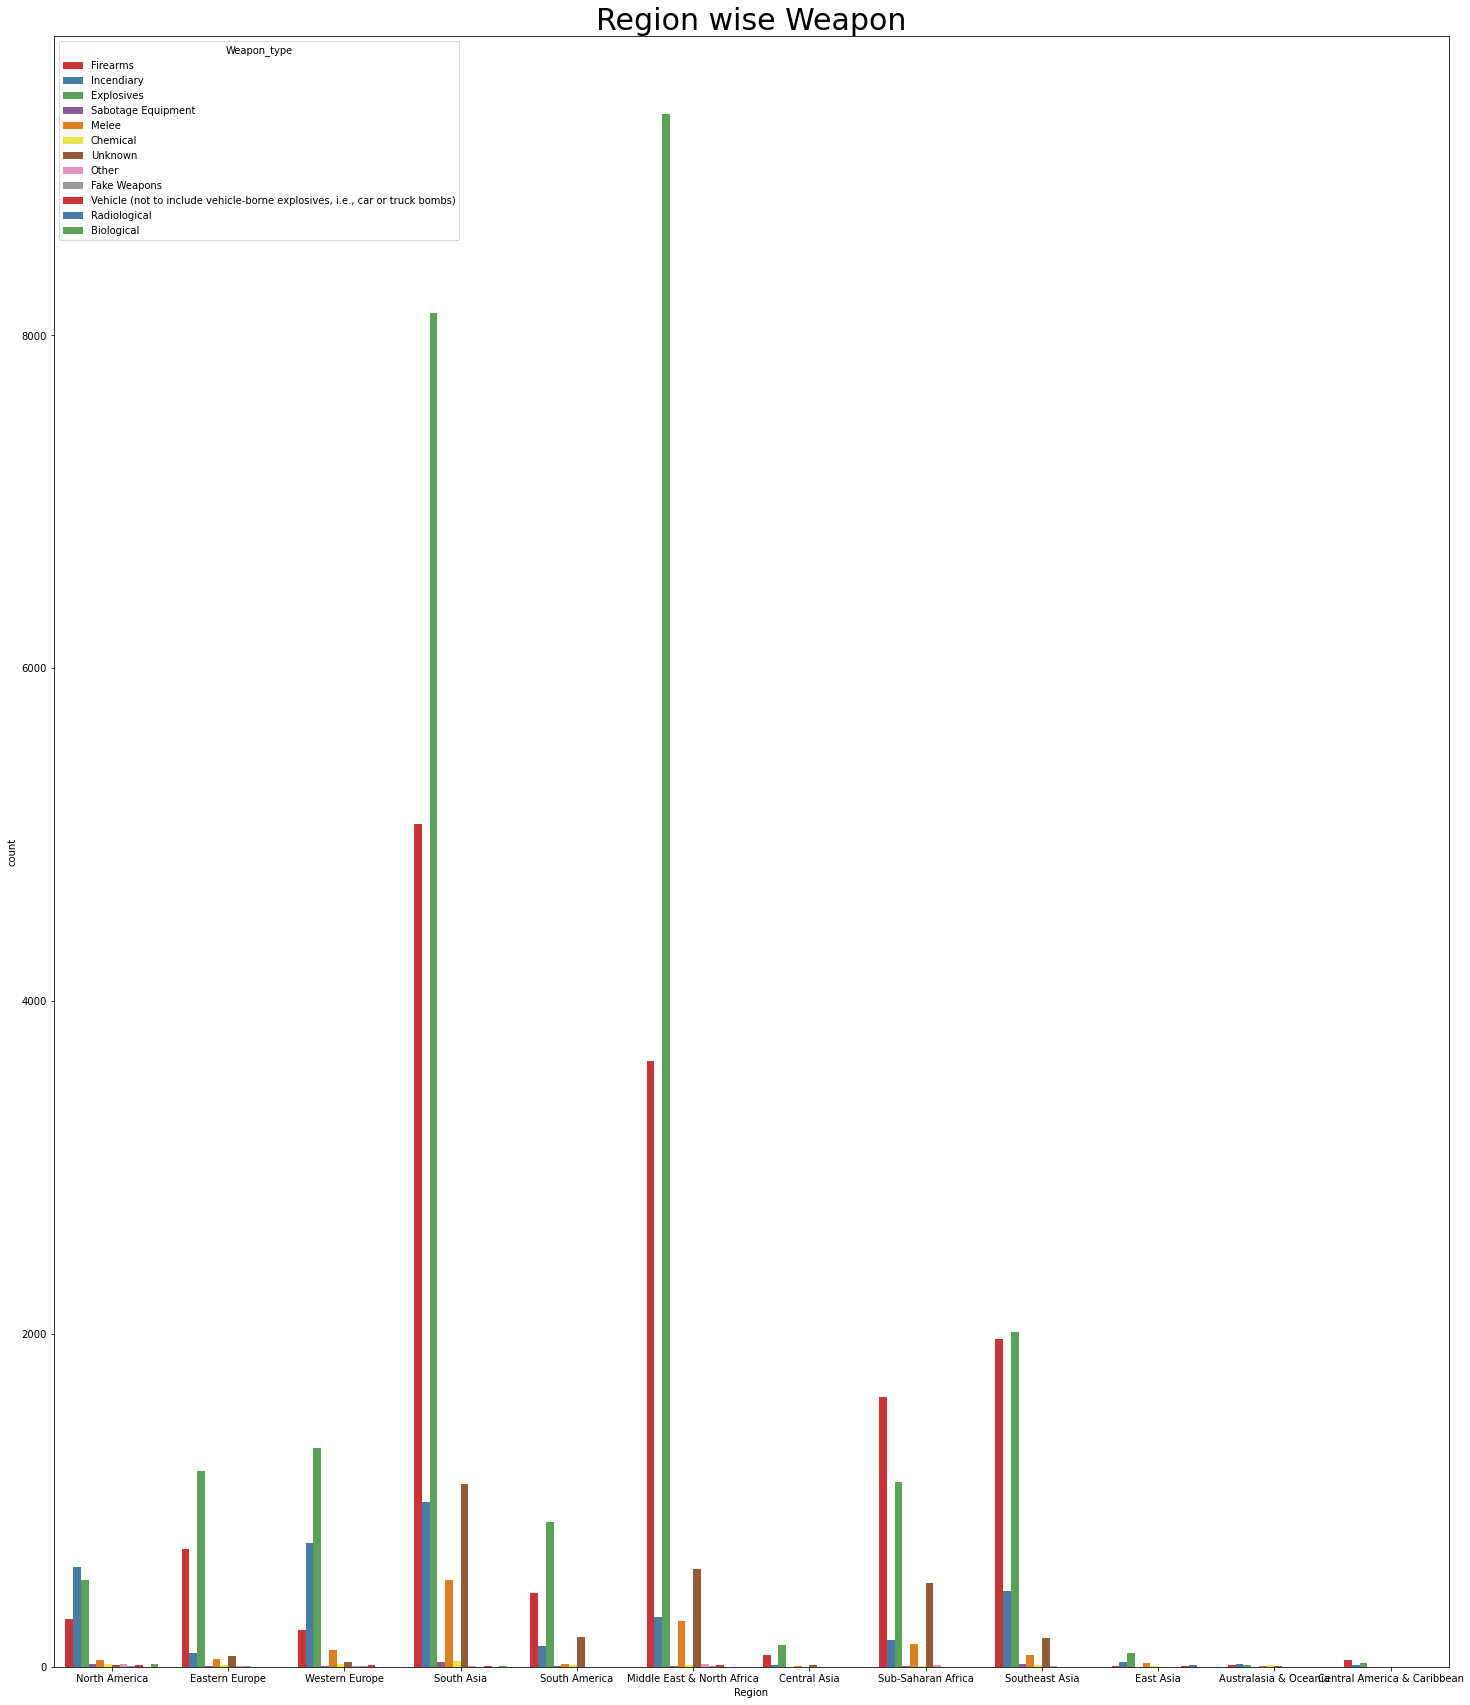

In [24]:
plt.subplots(figsize = (25,30))
sns.countplot(x="Region", hue ='Weapon_type', data = df,palette = "Set1")
plt.title('Region wise Weapon', fontsize = 30)
plt.show()

#### OBSERVATIONS:
#### We can see that South Asia and Middle East&North America have maximum number of weapons.
#### Middle East & north Africa have maximum biological weapon followed by South asia
#### The maximum number of firearms are owned by South Asia